Instead of using a dataframe of cell (rows), we can also gather just their gids!

In [1]:
import os
os.environ["LOGLEVEL"] = "PROD"

import numpy as np
import pandas as pd
from neuro_dmt.models.bluebrain.circuit.model import BlueBrainCircuitModel
from neuro_dmt.models.bluebrain.circuit.adapter import BlueBrainCircuitAdapter
from neuro_dmt.models.bluebrain.circuit.mock.test.mock_circuit_light\
    import circuit_composition, circuit_connectivity
from neuro_dmt.models.bluebrain.circuit.mock.circuit import\
    MockCircuit

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mtype', 'etype', 'synapse_class')
('region', 'layer', 'depth', 'height', 'mtype', 'etype', 'synapse_class')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')


In [2]:
mock_circuit =\
    MockCircuit.build(
        circuit_composition,
        circuit_connectivity)
circuit_model =\
    BlueBrainCircuitModel(
        mock_circuit,
        label="BlueBrainCircuitModelMock")
adapter = BlueBrainCircuitAdapter()
conn_prob = circuit_model.connection_probability

In [3]:
pre_synaptic_cell_type_specifier =\
    {"mtype",}
pre_synaptic_cells =\
    circuit_model\
    .get_cells(
        mtype="L23_MC"
    )
post_synaptic_cell_type_specifier =\
    {"mtype",}
post_synaptic_cells =\
    circuit_model\
    .get_cells(
        mtype="L23_MC"
    ).sample(n=100)
assert np.array_equal(
    pre_synaptic_cells.index.values,
    pre_synaptic_cells.gid.values)
assert np.array_equal(
    post_synaptic_cells.index.values,
    post_synaptic_cells.gid.values)
conn = circuit_model.connectome

In [4]:
adapter = BlueBrainCircuitAdapter()
aff_summary = adapter.get_afferent_connections_summary(
    circuit_model,
    {"mtype": "L6_TPC:A"},
    {"mtype",}
)

In [7]:
aff_summary

,size,mean,std
pre_synaptic_mtype,,,
L1_DAC,1066.0,1.349906,1.136870
L1_SLAC,1066.0,1.359287,1.094327
L23_ChC,1066.0,3.118199,1.800654
L23_MC,1066.0,3.236398,1.696843
L23_SBC,1066.0,3.204503,1.727279
L4_LBC,1066.0,1.878987,1.366050
L4_NGC,1066.0,1.895872,1.355026
L4_TPC,1066.0,35.161351,6.045077
L5_DBC,1066.0,4.694184,2.184517


In [8]:
adapter.get_efferent_connections_summary(
    circuit_model,
    {"mtype": "L6_TPC:A"},
    {"mtype",})

,size,mean,std
post_synaptic_mtype,,,
L1_DAC,1066.0,1.369606,1.170199
L1_SLAC,1066.0,1.380863,1.185741
L23_ChC,1066.0,3.243902,1.809362
L23_MC,1066.0,3.272983,1.846596
L23_SBC,1066.0,3.278612,1.768332
L4_LBC,1066.0,1.759850,1.309597
L4_NGC,1066.0,1.888368,1.370965
L4_TPC,1066.0,35.666041,5.695325
L5_DBC,1066.0,4.919325,2.097855


[Text(0, 0, 'L1_DAC'),
 Text(0, 0, 'L1_SLAC'),
 Text(0, 0, 'L23_ChC'),
 Text(0, 0, 'L23_MC'),
 Text(0, 0, 'L23_SBC'),
 Text(0, 0, 'L4_LBC'),
 Text(0, 0, 'L4_NGC'),
 Text(0, 0, 'L4_TPC'),
 Text(0, 0, 'L5_DBC'),
 Text(0, 0, 'L5_MC'),
 Text(0, 0, 'L5_TPC:A'),
 Text(0, 0, 'L5_TPC:B'),
 Text(0, 0, 'L5_UPC'),
 Text(0, 0, 'L6_ChC'),
 Text(0, 0, 'L6_IPC'),
 Text(0, 0, 'L6_MC'),
 Text(0, 0, 'L6_TPC:A'),
 Text(0, 0, 'L6_TPC:B'),
 Text(0, 0, 'L6_UPC')]

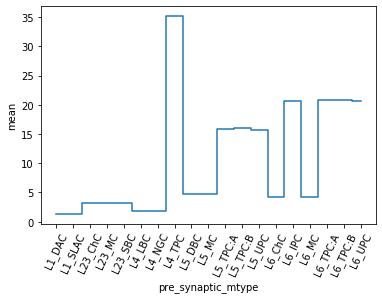

In [39]:
import seaborn; seaborn.set
import matplotlib.pyplot as plt
graphic = seaborn.lineplot(
    x="pre_synaptic_mtype",
    y="mean",
    #yerr="std",
    drawstyle="steps-mid",
    data=aff_summary.reset_index())
graphic.set_xticklabels(
    labels=aff_summary.reset_index().pre_synaptic_mtype,
    rotation=65)

In [185]:
pairs.groupby(
    "post_synaptic_gid"
).apply(
    lambda post_connectivity: post_connectivity.assign(
                                  dummy_variable=0
                              ).groupby(
                                  ["dummy_variable"]
                              ).agg(
                                ["sum"]
                              ).connected.rename(
                                  columns={
                                    "sum": "connection_strength"
                                  }
                              )
).groupby(
    ["dummy_variable"]
).agg(
    ["size", "mean", "std"]
)

connection_strength                       
                              size        mean        std
dummy_variable                                           
0                            10288  200.245529  14.266703

In [186]:
pairs.groupby(
    "pre_synaptic_gid"
).apply(
    lambda pre_connectivity: pre_connectivity.assign(
                                  dummy_variable=0
                              ).groupby(
                                  ["dummy_variable"]
                              ).agg(
                                ["sum"]
                              ).connected.rename(
                                  columns={
                                    "sum": "connection_strength"
                                  }
                              )
).groupby(
    ["dummy_variable"]
).agg(
    ["size", "mean", "std"]
)


connection_strength                       
                              size        mean        std
dummy_variable                                           
0                            10288  200.245529  13.896533

In [164]:
pairs.groupby(
    "post_synaptic_gid"
).apply(
    lambda post_connectivity: post_connectivity.assign(
                                  dummy_variable=0
                              ).groupby(
                                  ["dummy_variable"]
                              ).agg(
                                  ["size", "sum"]
                              ).connected.rename(
                                  columns={
                                      "size": "pairs_total",
                                      "sum": "pairs_connected"
                                  }
                             )
).groupby(
    ["dummy_variable"]
).agg(
    "sum"
).assign(
    connection_probability = lambda summary: (
        summary.pairs_connected / summary.pairs_total))

,pairs_total,pairs_connected,connection_probability
dummy_variable,,,
0,26896,525.0,0.01952


In [176]:
pairs.groupby(
    "pre_synaptic_gid"
).apply(
    lambda pre_connectivity: pre_connectivity.assign(
                                  dummy_variable=0
                              ).groupby(
                                  ["dummy_variable"]
                              ).agg(
                                  ["size", "sum"]
                              ).connected.rename(
                                  columns={
                                      "size": "pairs_total",
                                      "sum": "pairs_connected"
                                  }
                             )
).groupby(
    ["dummy_variable"]
).agg(
    "sum"
).assign(
    connection_probability = lambda summary: (
        summary.pairs_connected / summary.pairs_total))


,pairs_total,pairs_connected,connection_probability
dummy_variable,,,
0,26896,525.0,0.01952


Instead of numpy, we can use pandas to reindex pre synaptic cells by 
afferent id of a post synaptic cell. But, pandas is slower!

In [121]:
pre_synaptic_cells.columns

Index(['region', 'layer', 'nucleus', 'mtype', 'etype', 'morph_class',
       'synapse_class', 'x', 'y', 'z', 'gid'],
      dtype='object')